# Библиотеки

In [1]:
# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model


# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Загрузка датасетов из облака google
import gdown
from google.colab import files

from sklearn.metrics import r2_score

from tensorflow.keras.utils import plot_model     # Строит архитектуру модели

import seaborn as sns                             # Импортируем библиотеку seaborn
sns.set_style('darkgrid')                         # Устанавливаем стиль графиков

# from google.colab import files                    # Импорт файлов
import pickle

# Загружаем стандартные слои
from tensorflow.keras.layers import Input, concatenate, Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
# Загружаем сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Multiply
# Загружаем рекуррентные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
# Загружаем алгоритмы обучения/оптимизации
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, SGD, Nadam


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/moduli/')
# import PlotFunctions

# from PlotFunctions import plt_figure_accuracy
import PlotFunctions
print(dir(PlotFunctions))            # просмотр содержимого

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


['K', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'eval_net', 'get_corr', 'ipd', 'librosa', 'load_audio', 'mean_absolute_error', 'mean_squared_error', 'my_f1_score', 'np', 'pd', 'plt', 'plt_figure_accuracy', 'plt_figure_dice_coef', 'plt_figure_f1_score', 'plt_figure_loss', 'plt_figure_mae', 'plt_scatter_pred', 'show_spectre', 'sns']


# Функция перевода в Bag of Words. 'Текст Сообщения'.
Преобразование текстовых данных в числовые и векторные представления для обучения

In [4]:
df = pd.read_csv('/content/drive/My Drive/Курск_ классификацияNLP/dfAll_lemm.csv', index_col= 0)
print(len(df))
df

3000


,Текст Сообщения,Тематика,Ответственное лицо,Категория,Ответственное,persons
id,,,,,,
2246,помочь начальник льговский рэс реагировать жал...,"нарушения, связанный содержание электросеть ка...",Администрация Льговского района,3.0,13,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
380,<p>по фасад дом адрес ул. урицкий 22 проходить...,аварийный дерево,Администрация города Курска,3.0,34,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ..."
2240,агресивный собаки. радуга стая подрасти щенок ...,безнадзорный животное,Администрация города Курска,1.0,34,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ..."
596,<p>ич пересечение &nbsp;улица сосновский берег...,нескошенный сорный растительность место общий ...,Комитет дорожного хозяйства города Курска,3.0,45,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, ..."
1797,<p style=`text-align:justify;`><span style=`ba...,аварийный дерево,Комитет городского хозяйства города Курска,3.0,44,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
2619,"добрый день! семья житель пос волокно, просыпа...",неприятный запах,Комитет природных ресурсов Курской области,NaN,59,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2518,лазарев 5 г.щигры ветка тополь скоро выбить ст...,аварийный дерево,Администрация города Щигры,NaN,38,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2524,вход комитет образование курск ям дорога,нарушение дорожный покрытие (ямы) дорога грани...,Комитет дорожного хозяйства города Курска,NaN,45,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, ..."


In [5]:
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#Для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
#num_words=maxWordsCount - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' - избавляемся от ненужных символов                 \xa0\ufeff
#lower=True - приводим слова к нижнему регистру
#split=' ' - разделяем слова по пробелу
#char_level=False - просим токенайзер не удалять однобуквенные слова
def tokenizerTexts(maxWordsCount_, texts_):
  tokenizer = Tokenizer(num_words=maxWordsCount_, 
                        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0\ufeff', 
                        lower=True, split=' ', oov_token='unknown', char_level=False)


  tokenizer.fit_on_texts(texts_)   # "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
  return  tokenizer

Только для Словаря два столбца ['Текст Сообщения', 'Тематика']

In [6]:
def translate_Emb_BOW(maxWords_, texDict, texts_):
  tokenizer = tokenizerTexts(maxWords_, texDict)
  dictItems = dict(tokenizer.word_index.items())   # Вытаскиваем индексы слов для просмотра
  # для Embedding/ Эмбэддинга представляем текст в виде последовательности индексов слов, каждый из которых затем преобразуем в многомерный вектор
  WordIndexesEmb = tokenizer.texts_to_sequences(texts_) # [131, 1645, 733, ..]
  
  # Bag of Words.
  # Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой
  WordBOW = tokenizer.sequences_to_matrix(WordIndexesEmb) # [0., 0., 1., 1., 1....]
  
  return tokenizer, dictItems, WordIndexesEmb, WordBOW

In [7]:
# Извлекаем данные всех текстов из столбца 'title'
texts = df['Текст Сообщения'].values      
tema = df['Тематика'].values  
texDict = np.concatenate([texts, tema])
print(texDict.shape)

maxWords = 6000

tokenizer, dictItems, WordIndexesEmb, WordBOW, = translate_Emb_BOW(maxWords, texDict, texts)

print(WordBOW.shape)
print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              \n", texts[0], '\n')
print("Он же в виде последовательности индексов: \n", WordIndexesEmb[0], '\n')
print("Он же Для Bag of Words:                   \n", WordBOW[0][:22], '\n')

(6000,)
(3000, 6000)
Взглянем на фрагмент обучающего текста:
В виде оригинального текста:              
 помочь начальник льговский рэс реагировать жалобы, малый ветер сидеть света, именно деревня больший угон улица старый слобода. пожалуйста помогите, пускай вычистить фотоотчёт сделать 

Он же в виде последовательности индексов: 
 [170, 1709, 813, 3692, 1092, 3693, 1305, 612, 988, 2285, 293, 415, 284, 5647, 10, 585, 5648, 149, 1306, 1021, 3694, 3177, 61] 

Он же Для Bag of Words:                   
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



In [8]:
print(len(dictItems))
dictItems["расписание"]

16958


1017

In [ ]:
print(type(WordIndexesEmb))
ETrain = np.array(WordIndexesEmb)[:2000]
ETest = np.array(WordIndexesEmb)[2000:]
print(ETrain.shape)
print(ETest.shape)

<class 'list'>
(2000,)
(1000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


8
337.05033333333336
220.0
13168


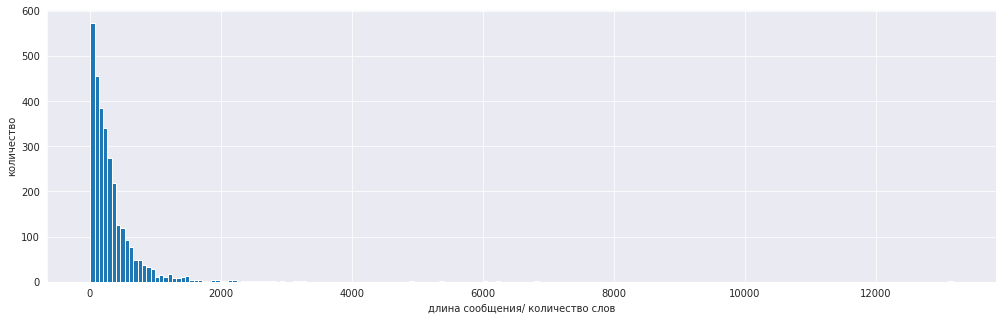

In [ ]:
# Гистограмма Длины Обращения
lenXTrainE = [len(x) for x in texts]
print(np.min(lenXTrainE))
print(np.mean(lenXTrainE))
print(np.median(lenXTrainE))
print(np.max(lenXTrainE))
plt.figure(figsize=(17,5))
plt.hist(lenXTrainE, 200)
plt.ylabel('количество')
plt.xlabel('длина сообщения/ количество слов')
plt.show()

In [ ]:
# Ограничиваем последовательность 330 слов. все что боллее не будет учитываться, а все что менее добьется нулями

maxlen = 330
ETrain = pad_sequences(ETrain, maxlen=maxlen)    # Преобразуем входные векторы для Обучения
ETest = pad_sequences(ETest, maxlen=maxlen)        # Преобразуем входные векторы для Проверки   

print(ETrain.shape)
print(ETest.shape)

(2000, 330)
(1000, 330)


In [ ]:
ETrain

array([[   0,    0,    0, ..., 3694, 3177,   61],
       [   0,    0,    0, ..., 1245, 1615,    2],
       [   0,    0,    0, ..., 3180,   32,  196],
       ...,
       [   0,    0,    0, ...,  116,  178, 2995],
       [   0,    0,    0, ..., 1358,  164,   57],
       [   0,    0,    0, ...,    1,    1,    2]], dtype=int32)

In [ ]:
BOWTrain = WordBOW[:2000]
BOWTest = WordBOW[2000:]
BOWTrain.shape

(2000, 4000)

In [ ]:
# Сохранение/восстановление датасета 
with open('/content/drive/My Drive/Курск_ классификацияNLP/tokenizerTitleWithDataSet4000.pickle', 'wb') as pick:
    pickle.dump((tokenizer, dictItems, BOWTrain, BOWTest, ETrain, ETest), pick)


# with open('/content/drive/My Drive/Курск_ классификацияNLP/tokenizerTitleWithDataSet.pickle', 'rb') as pick:
#     tokenizer, dictItems, WordBOWTrain, WordBOWTest, ETrain, ETest = pickle.load(pick)


# Загружаем tokenizerWithDataSet.pickle

In [ ]:
with open('/content/drive/My Drive/Курск_ классификацияNLP/tokenizerTitleWithDataSet.pickle', 'rb') as pick:
    tokenizer, dictItems, BOWTrain, BOWTest, ETrain, ETest = pickle.load(pick)

maxWords = 6000

In [ ]:
print(len(dictItems))
dictItems["расписание"]

16958


1017

In [ ]:
print(ETrain.shape)
print(ETest.shape)
print(BOWTrain.shape)
print(BOWTest.shape)

(2000, 330)
(1000, 330)
(2000, 6000)
(1000, 6000)


In [ ]:
ETrain

array([[   0,    0,    0, ..., 3694, 3177,   61],
       [   0,    0,    0, ..., 1245, 1615,    2],
       [   0,    0,    0, ..., 3180,   32,  196],
       ...,
       [   0,    0,    0, ...,  116,  178, 2995],
       [   0,    0,    0, ..., 1358,  164,   57],
       [   0,    0,    0, ...,    1,    1,    2]], dtype=int32)

In [ ]:
BOWTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

# Загружаем dfTrain , dfTest

In [ ]:
dfTrain = pd.read_csv('/content/drive/My Drive/Курск_ классификацияNLP/dfTrain.csv', index_col= 0)
dfTest = pd.read_csv('/content/drive/My Drive/Курск_ классификацияNLP/dfTest.csv', index_col= 0)

dfTrain.head(1)

,Текст Сообщения,Тематика,Ответственное лицо,Категория,Ответственное,persons
id,,,,,,
2246,помочь начальник льговский рэс реагировать жал...,"нарушения, связанный содержание электросеть ка...",Администрация Льговского района,3.0,13,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
Y = dfTrain['Категория'].values
print(Y.shape)
Y = utils.to_categorical(Y, 17)

# Y = Y[..., None]
print(Y.shape)
Y[:5]

(2000,)
(2000, 17)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [ ]:
dfTrain.columns

Index(['Текст Сообщения', 'Тематика', 'Ответственное лицо', 'Категория',
       'Ответственное', 'persons'],
      dtype='object')

In [ ]:
X_persons = dfTrain['persons'].values
print(type(X_persons))
print(type(X_persons[0]))
X_persons[0]

<class 'numpy.ndarray'>
<class 'str'>


'[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]'

In [ ]:
X_persons[0][1:-1]

'1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1'

In [ ]:
n = list(map(int, X_persons[0][1:-1].split(', ')))
n

[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
def getData_persons(arrValues):
    Xdata = []      
    for elemStr in arrValues:                         # "[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]"
        s = list(map(int, elemStr[1:-1].split(', '))) # [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]
        Xdata.append(s)
   
    return  np.array(Xdata)


In [ ]:
Xdata = getData_persons(X_persons)
print(type(Xdata))
print(Xdata.shape)
Xdata[:5]

<class 'numpy.ndarray'>
(2000, 17)


array([[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
dfTrain['persons'].head()

id
2246    [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
380     [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ...
2240    [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ...
596     [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...
1797    [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: persons, dtype: object

In [ ]:
XdataTest = getData_persons(dfTest['persons'].values)
print(type(XdataTest))
print(XdataTest.shape)
XdataTest[:5]

<class 'numpy.ndarray'>
(1000, 17)


array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]])

In [ ]:
dfTest['persons'].head()

id
843     [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
1422    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
2782    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
2704    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
1       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ...
Name: persons, dtype: object

In [ ]:
dfTrain['Категория']

id
2246     3.0
380      3.0
2240     1.0
596      3.0
1797     3.0
        ... 
1356    16.0
243      0.0
2350     3.0
1937     0.0
1185     4.0
Name: Категория, Length: 2000, dtype: float64

## Деление выборки

In [ ]:
print(BOWTrain.shape)
print(BOWTest.shape)
print(ETrain.shape)
print(ETest.shape)
print(Y.shape)

(2000, 6000)
(1000, 6000)
(2000, 330)
(1000, 330)
(2000, 17)


In [ ]:
BOW_T, BOW_test, E_T, E_test, Y_T, Y_test = train_test_split(
    BOWTrain, ETrain,  Y, 
    test_size=0.15, 
    shuffle=True,
    random_state= 16)

BOW_train, BOW_val, E_train, E_val, y_train, y_val = train_test_split(
    BOW_T, E_T, Y_T,
    test_size=0.15, 
    shuffle=True,
    random_state= 16)

print(y_train.shape)
print(y_val.shape, '\n')

print(BOW_train.shape)
print(BOW_val.shape)

print(E_train.shape)
print(E_val.shape, '\n')

(1445, 17)
(255, 17) 

(1445, 6000)
(255, 6000)
(1445, 330)
(255, 330) 



# Оценка точности

In [ ]:
from tensorflow.keras import backend as K
import tensorflow as tf

# Функция нужна для точности
def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)

    
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def scoreR2(y_true, y_pred):
    score_views = coeff_determination(y_true[:, 0], y_pred[:, 0])
    score_depth = coeff_determination(y_true[:, 1], y_pred[:, 1])
    score_frp = coeff_determination(y_true[:, 2], y_pred[:, 2])
    return (0.4 * score_views + 0.3 * score_depth + 0.3 * score_frp)

from sklearn.metrics import r2_score
def r2_score(y_test, predict ):
    score_views = r2_score(y_test[:,0], predict[:,0])
    score_depth = r2_score(y_test[:,1], predict[:,1])
    score_frp = r2_score(y_test[:,2], predict[:,2])

    return (0.4 * score_views + 0.3 * score_depth + 0.3 * score_frp)


# сервисные функции

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

patch = '/content/drive/My Drive/Курск_ классификацияNLP/'
model_checkpointM = ModelCheckpoint(filepath=os.path.join(patch, 'model_weightsM.h5'), 
                                   monitor='val_MeanIoU', 
                                   verbose=1, 
                                   save_best_only=True,
                                   save_weights_only=True,  # СОХРАНЯЕМ ВЕСА Модели
                                   mode='max')   # mode='auto'

model_checkpointLoss = ModelCheckpoint(filepath=os.path.join(patch, 'model_weightsLoss.h5'), 
                                   monitor='val_loss', 
                                   verbose=1, 
                                   save_best_only=True,
                                   save_weights_only=True,  # СОХРАНЯЕМ ВЕСА Модели
                                   mode='min')   # mode='auto'

model_checkpointA = ModelCheckpoint(filepath=os.path.join(patch, 'model_weightsA.h5'), 
                                   monitor='val_accuracy', 
                                   verbose=1, 
                                   save_best_only=True,
                                   save_weights_only=True,  # СОХРАНЯЕМ ВЕСА Модели
                                   mode='max')   # mode='auto'

# patchMod = '/content/drive/My Drive/Ярославль/model_weightsUnet.h5'
# callbacks=[model_checkpoint]

In [ ]:
# https://keras.io/examples/structured_data/imbalanced_classification/
from tensorflow.keras.metrics import AUC,MeanIoU, MeanAbsoluteError, MeanSquaredError, FalseNegatives, FalsePositives, TrueNegatives, TruePositives, Precision, Recall

metrics = [
    MeanIoU(num_classes = 17, name="MeanIoU"),
    AUC(multi_label = True, name="AUC"),
]

In [ ]:
def pltFigureLoss(history_):
  plt.figure(1, figsize=(18, 4))
  
  plt.plot(history_.history['loss'], 
         label='Ошибка на обучающем наборе')
  plt.plot(history_.history['val_loss'], 
         label=f'Ошибка на проверочном наборе, {round(history_.history["val_loss"][-1], 5)}')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.show()


def pltFigure(history_, loss = 'loss', val_loss ='val_loss'):
  plt.figure(1, figsize=(18, 4))
  
  plt.plot(history_.history[loss], 
         label='на обучающем наборе')
  plt.plot(history_.history[val_loss], 
         label=f"на проверочном наборе, {round(history_.history[val_loss][-1], 5)}")
  plt.xlabel('Эпоха обучения')
  plt.ylabel(loss)
  plt.legend()
  plt.show()

In [ ]:
def argmaxPredictTest(predictTest):
    pred = []
    for elem in predictTest:
      pred.append(np.argmax(elem))
    return np.array(pred)

def predictTestSample(predictTest, name = '1'):
  print(predictTest.shape)
  pred = argmaxPredictTest(predictTest)
  print(pred.shape) 
  dfS = pd.read_csv('/content/drive/My Drive/Курск_ классификацияNLP/sample_solution.csv', index_col= 0)
  dfS['Категория'] = pred

  dfS.to_csv(f'sub{name}.csv', header=True, index=True)
  files.download(f'sub{name}.csv')
  return dfS

# Решение

# № 12_concatenate4_ BOW(6000)"swish"
* по MIoU > Score = 0.730384
* по acc  > Score = 0.756324

In [ ]:
print(y_train.shape)
print(y_val.shape, '\n')

print(BOW_train.shape)
print(BOW_val.shape)

print(E_train.shape)
print(E_val.shape, '\n')

print(BOW_train.shape[1:])
print(y_train.shape[-1])

(1445, 17)
(255, 17) 

(1445, 6000)
(255, 6000)
(1445, 330)
(255, 330) 

(6000,)
17


In [ ]:
BOW_train.shape[1:]

(6000,)

In [ ]:
def createModel():
  input1 = Input(BOW_train.shape[1:])

  x1 = Dense(1024, activation="swish")(input1)  # "elu", "relu", "swish"
  x1 = Dropout(0.3)(x1)
  x1 = BatchNormalization()(x1)
  x1 = Dense(64, activation="swish")(x1)


  x2 = Dense(1024, activation="swish")(input1)
  x2 = Dropout(0.3)(x2)
  x2 = BatchNormalization()(x2)
  x2 = Dense(64, activation="softmax")(x2)


  x3 = Dense(512, activation="swish")(input1)
  x3 = Dropout(0.3)(x3)
  x3 = BatchNormalization()(x3)
  x3 = Dense(64, activation="softmax")(x3)

  x4 = Dense(64, activation="softmax")(input1)

  # x5 = Dense(500, activation="softmax")(input1)

  x = concatenate([x1, x2, x3, x4])

  x = Dense(64, activation='swish')(x)
  x = Dropout(0.3)(x)

#Выходной полносвязный слой
  out = Dense(y_train.shape[-1], activation='softmax')(x)

  model = Model(input1, out)
  
  model.compile(optimizer=Adam(learning_rate=0.001),                # Adam(lr=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])              # optimizer=Adam(lr=0.001), Adagrad - Среднеквадратичное распространение корня
                                                 # "categorical_crossentropy" Для задачь Классификации где несколько классов
                                                 # 'binary_crossentropy'  Для задачь Классификации где только 2 класса
                                                 # 'mse' универсальная,  для задачь Регрессии (Предсказания)

  return model                                   # Возвращаем созданную сеть

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 6000)]       0           []                               
                                                                                                  
 dense_50 (Dense)               (None, 1024)         6145024     ['input_6[0][0]']                
                                                                                                  
 dense_52 (Dense)               (None, 1024)         6145024     ['input_6[0][0]']                
                                                                                                  
 dense_54 (Dense)               (None, 512)          3072512     ['input_6[0][0]']                
                                                                                            

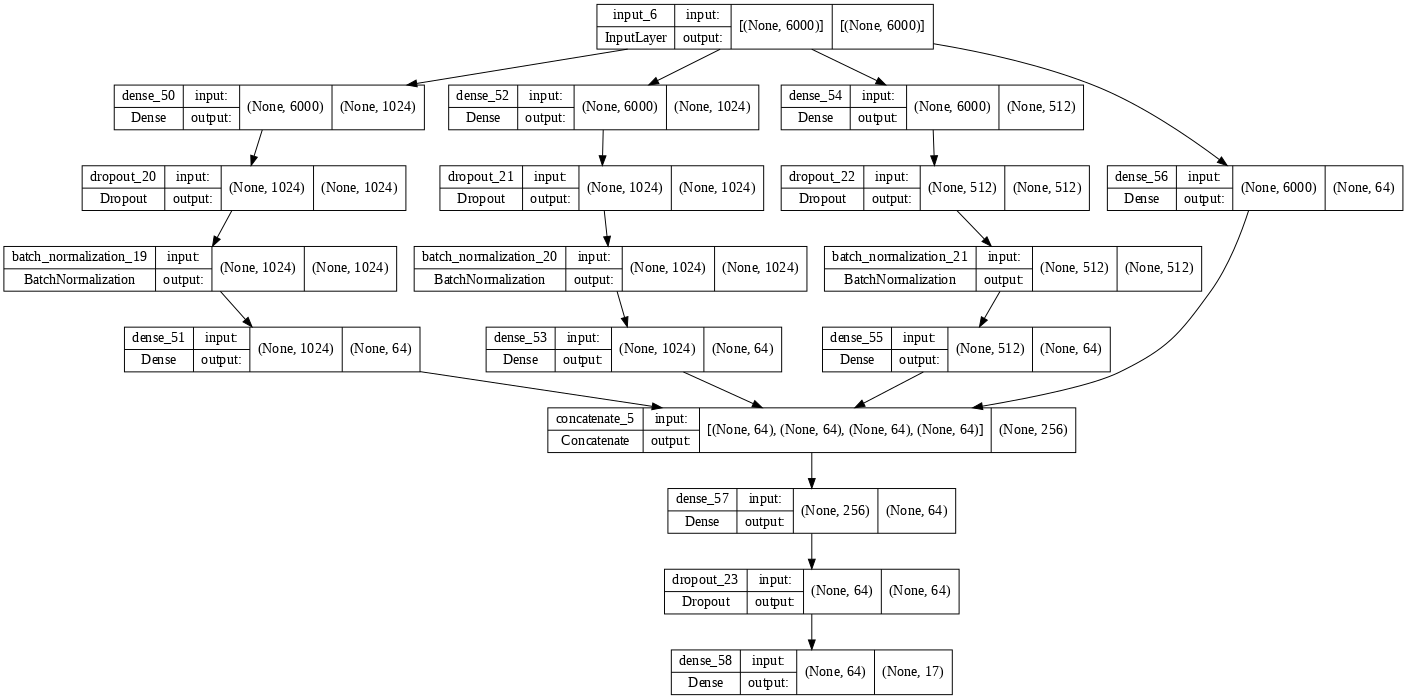

In [ ]:
model = createModel()
model.summary()
print()
plot_model(model, dpi=70, show_shapes=True )

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.002),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
#               loss='categorical_crossentropy', 
#               metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/50
45/46 [============================>.] - ETA: 0s - loss: 1.6112 - accuracy: 0.5715 - dice_coef: 0.3862 - MeanIoU: 0.4879 - AUC: 0.6793
Epoch 1: val_accuracy improved from -inf to 0.57647, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5

Epoch 1: val_loss improved from inf to 2.15454, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5

Epoch 1: val_MeanIoU improved from -inf to 0.47059, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5
46/46 [==============================] - 7s 111ms/step - loss: 1.6082 - accuracy: 0.5723 - dice_coef: 0.3914 - MeanIoU: 0.4878 - AUC: 0.6796 - val_loss: 2.1545 - val_accuracy: 0.5765 - val_dice_coef: 0.1402 - val_MeanIoU: 0.4706 - val_AUC: 0.5957
Epoch 2/50
45/46 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.8562 - dice_coef: 0.7862 - MeanIoU: 0.4724 - AUC: 0.8982
Epoch 2: val_accuracy improved from 0.57647 to 0.66275, s

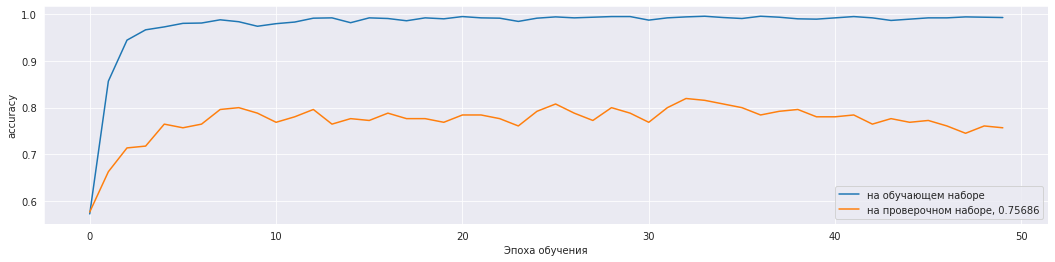

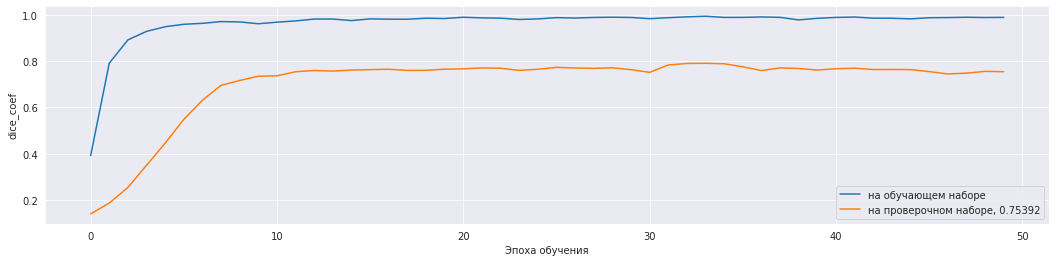

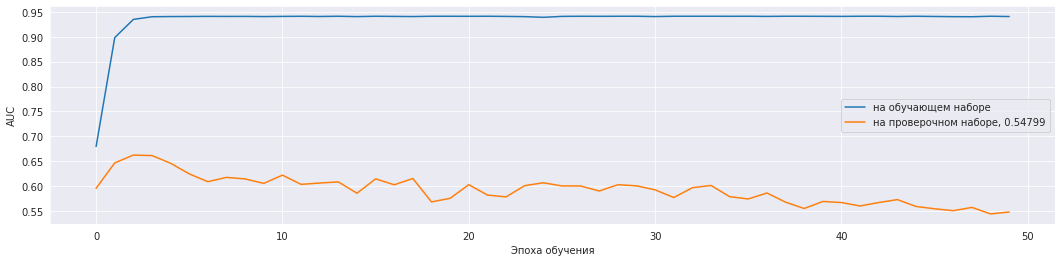

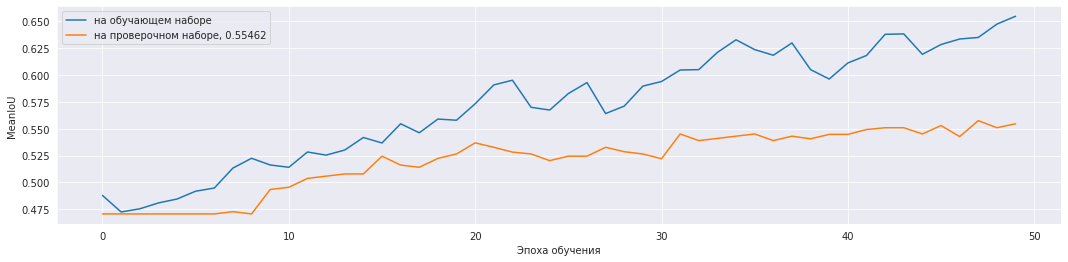

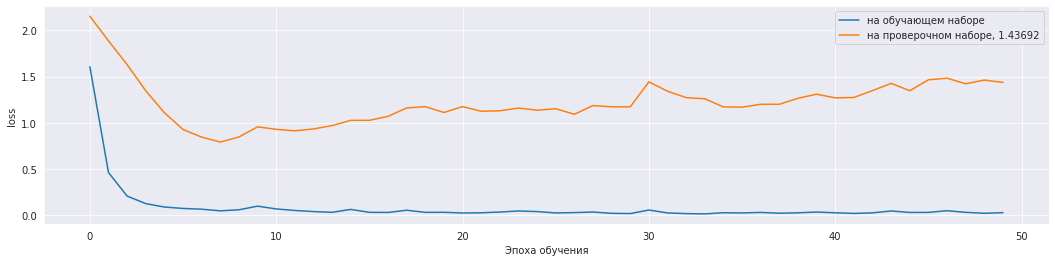

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'AUC', 'val_AUC')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')



In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 18ms/step - loss: 1.6665 - accuracy: 0.7667 - dice_coef: 0.7436 - MeanIoU: 0.5316 - AUC: 0.6570


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5')

score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 1.0520 - accuracy: 0.7333 - dice_coef: 0.6594 - MeanIoU: 0.4722 - AUC: 0.7499


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 1.8004 - accuracy: 0.7400 - dice_coef: 0.7260 - MeanIoU: 0.5470 - AUC: 0.6093


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.002),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=40, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/40
45/46 [============================>.] - ETA: 0s - loss: 0.0443 - accuracy: 0.9861 - dice_coef: 0.9810 - MeanIoU: 0.6816 - AUC: 0.9410
Epoch 1: val_accuracy did not improve from 0.81961

Epoch 1: val_loss did not improve from 0.79035

Epoch 1: val_MeanIoU did not improve from 0.55755
46/46 [==============================] - 6s 74ms/step - loss: 0.0441 - accuracy: 0.9862 - dice_coef: 0.9814 - MeanIoU: 0.6823 - AUC: 0.9410 - val_loss: 1.7125 - val_accuracy: 0.7569 - val_dice_coef: 0.7473 - val_MeanIoU: 0.5555 - val_AUC: 0.5385
Epoch 2/40
45/46 [============================>.] - ETA: 0s - loss: 0.0993 - accuracy: 0.9729 - dice_coef: 0.9649 - MeanIoU: 0.6235 - AUC: 0.9399
Epoch 2: val_accuracy did not improve from 0.81961

Epoch 2: val_loss did not improve from 0.79035

Epoch 2: val_MeanIoU did not improve from 0.55755
46/46 [==============================] - 3s 59ms/step - loss: 0.0990 - accuracy: 0.9730 - dice_coef: 0.9653 - MeanIoU: 0.6234 - AUC: 0.9400 - val_loss: 1.5616 - v

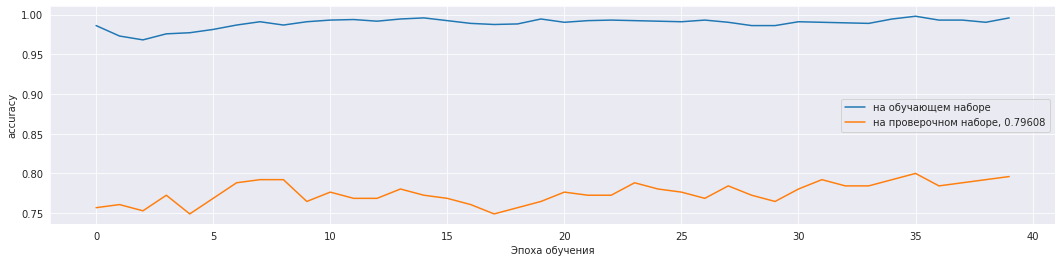

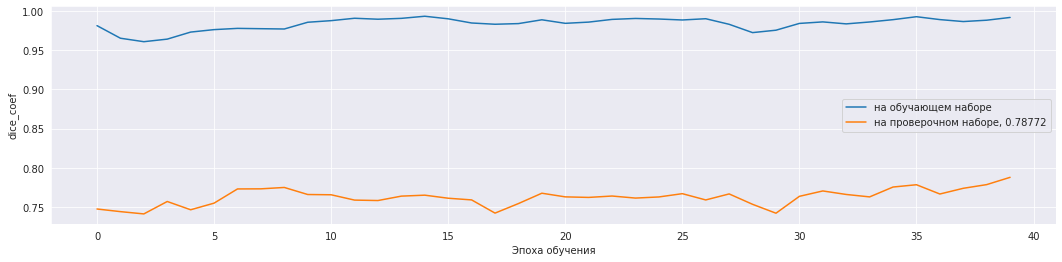

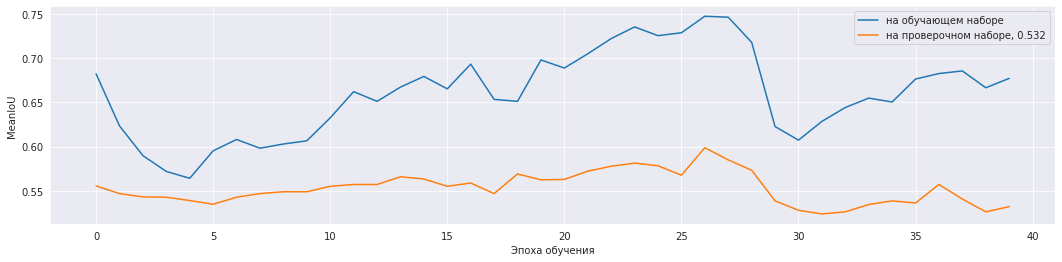

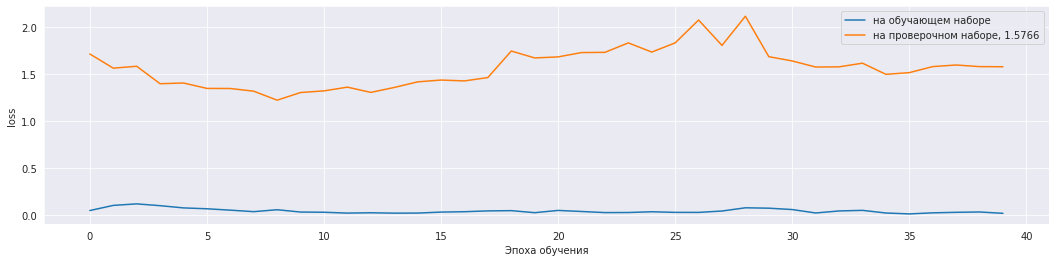

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 1s 58ms/step - loss: 1.6665 - accuracy: 0.7667 - dice_coef: 0.7436 - MeanIoU: 0.5316 - AUC: 0.6570


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5')

score = model.evaluate(BOW_test,Y_test)

10/10 [==============================] - 1s 63ms/step - loss: 1.0520 - accuracy: 0.7333 - dice_coef: 0.6594 - MeanIoU: 0.4722 - AUC: 0.7499


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 1s 53ms/step - loss: 2.4522 - accuracy: 0.7367 - dice_coef: 0.7040 - MeanIoU: 0.6032 - AUC: 0.6470


## WordBOWTest, ETest, XdataTest

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 19ms/step - loss: 1.6665 - accuracy: 0.7667 - dice_coef: 0.7436 - MeanIoU: 0.5316 - AUC: 0.6570


In [ ]:
predictTest = model.predict(BOWTest)
dfS = predictTestSample(predictTest, '12_A_0.7667')

(1000, 17)
(1000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weights №12_accuracy_0.7667.h5')

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 1s 49ms/step - loss: 2.4522 - accuracy: 0.7367 - dice_coef: 0.7040 - MeanIoU: 0.6032 - AUC: 0.6470


In [ ]:
# ПРЕДИКТ WordBOWTest
print(BOWTest.shape)

(1000, 6000)


In [ ]:
predictTest = model.predict(BOWTest)
dfS = predictTestSample(predictTest, '12MIoU_0.60')

(1000, 17)
(1000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# model.save_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weights №12_MIoU_0.60.h5')

# №10: BOW(6000)"elu"__  MIoU_0.5986 > Score = 0.698238

In [ ]:
print(y_train.shape)
print(y_val.shape, '\n')

print(BOW_train.shape)
print(BOW_val.shape)

print(E_train.shape)
print(E_val.shape, '\n')

print(BOW_train.shape[1:])
print(y_train.shape[-1])

(1445, 17)
(255, 17) 

(1445, 6000)
(255, 6000)
(1445, 330)
(255, 330) 

(6000,)
17


In [ ]:
BOW_train.shape[1:]

(6000,)

In [ ]:
def createModel():
  input1 = Input(BOW_train.shape[1:])

  x1 = Dense(1024, activation="elu")(input1)  # "elu", "relu", "swish"
  x1 = Dropout(0.3)(x1)
  x1 = BatchNormalization()(x1)
  x1 = Dense(100, activation="elu")(x1)


  x2 = Dense(1024, activation="elu")(input1)
  x2 = Dropout(0.3)(x2)
  x2 = BatchNormalization()(x2)
  x2 = Dense(100, activation="softmax")(x2)


  x3 = Dense(500, activation="elu")(input1)
  x3 = Dropout(0.3)(x3)
  x3 = BatchNormalization()(x3)
  x3 = Dense(200, activation="softmax")(x3)

  x4 = Dense(200, activation="softmax")(input1)

  x5 = Dense(500, activation="softmax")(input1)

  x = concatenate([x1, x2, x3, x4, x5])

  x = Dense(100, activation='elu')(x)
  x = Dropout(0.3)(x)

#Выходной полносвязный слой
  out = Dense(y_train.shape[-1], activation='softmax')(x)

  model = Model(input1, out)
  
  model.compile(optimizer=Adam(learning_rate=0.001),                # Adam(lr=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])              # optimizer=Adam(lr=0.001), Adagrad - Среднеквадратичное распространение корня
                                                 # "categorical_crossentropy" Для задачь Классификации где несколько классов
                                                 # 'binary_crossentropy'  Для задачь Классификации где только 2 класса
                                                 # 'mse' универсальная,  для задачь Регрессии (Предсказания)

  return model                                   # Возвращаем созданную сеть

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6000)]       0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 1024)         6145024     ['input_2[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 1024)         6145024     ['input_2[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 500)          3000500     ['input_2[0][0]']                
                                                                                            

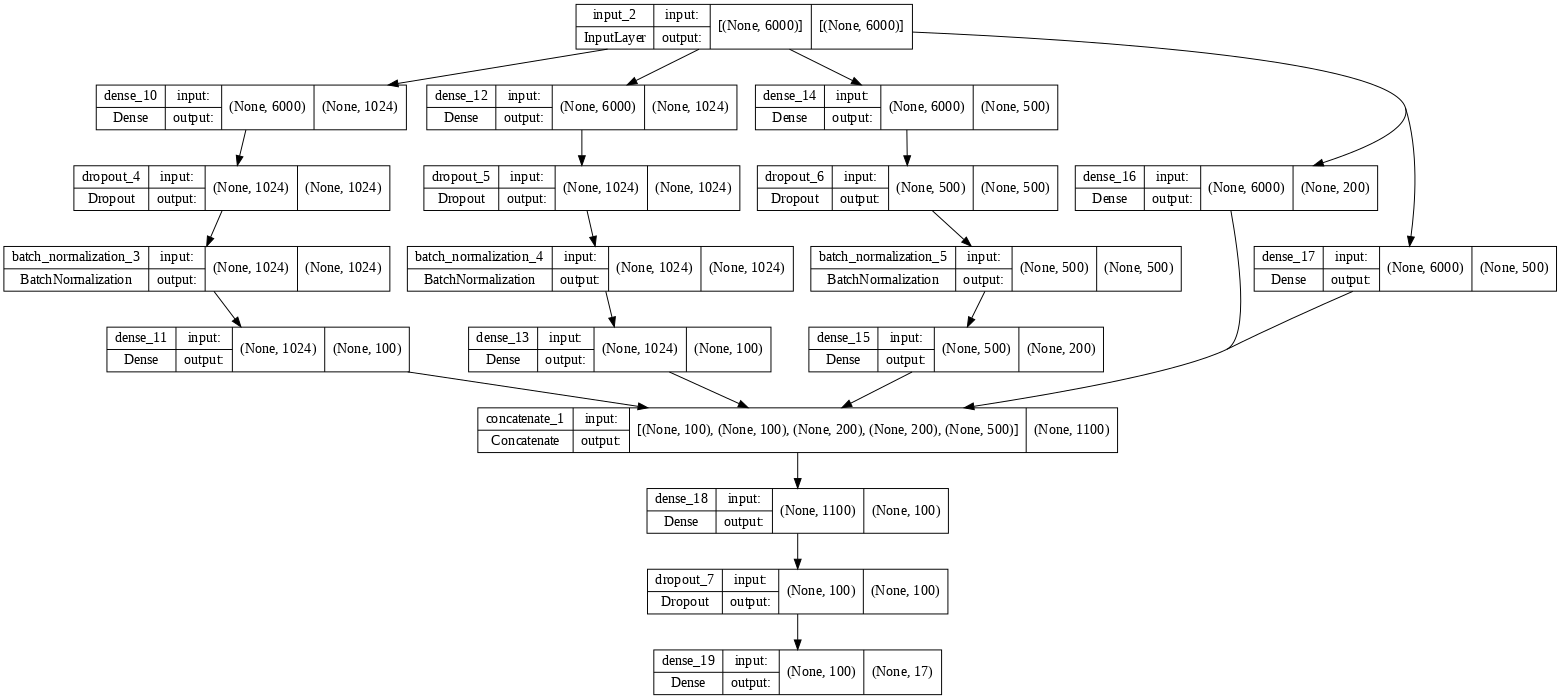

In [ ]:
model = createModel()
model.summary()
print()
plot_model(model, dpi=70, show_shapes=True )

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
#               loss='categorical_crossentropy', 
#               metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/50
46/46 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9799 - dice_coef: 0.9631 - MeanIoU: 0.4819 - AUC: 0.9405
Epoch 1: val_accuracy improved from -inf to 0.78039, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5

Epoch 1: val_loss improved from inf to 0.77975, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5

Epoch 1: val_MeanIoU improved from -inf to 0.47059, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5
46/46 [==============================] - 5s 106ms/step - loss: 0.0759 - accuracy: 0.9799 - dice_coef: 0.9631 - MeanIoU: 0.4819 - AUC: 0.9405 - val_loss: 0.7798 - val_accuracy: 0.7804 - val_dice_coef: 0.6811 - val_MeanIoU: 0.4706 - val_AUC: 0.6031
Epoch 2/50
46/46 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9889 - dice_coef: 0.9648 - MeanIoU: 0.4819 - AUC: 0.9409
Epoch 2: val_accuracy did not improve from 0.78039

Epoch

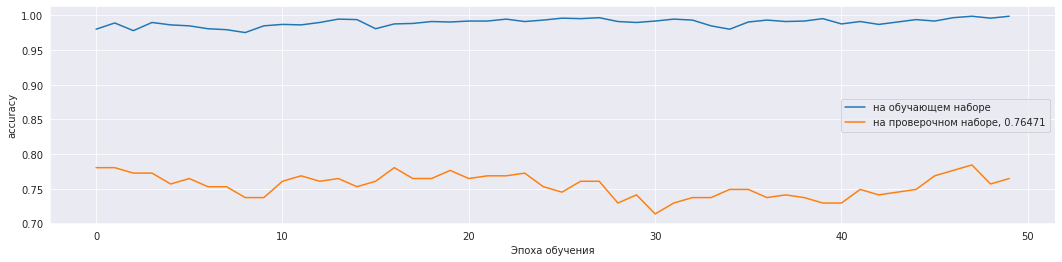

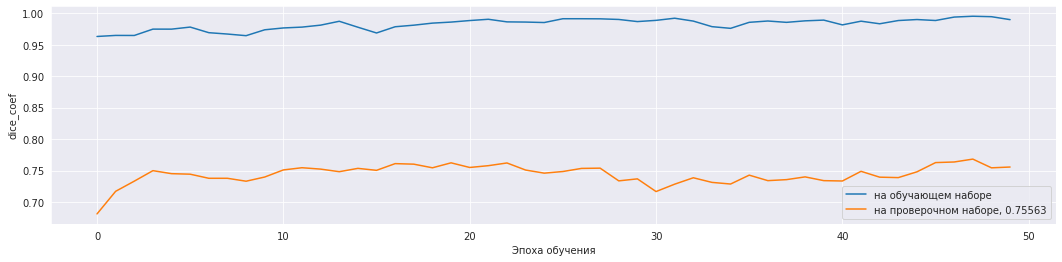

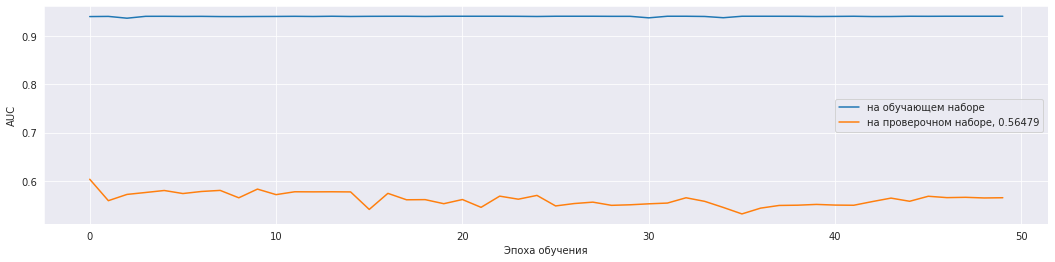

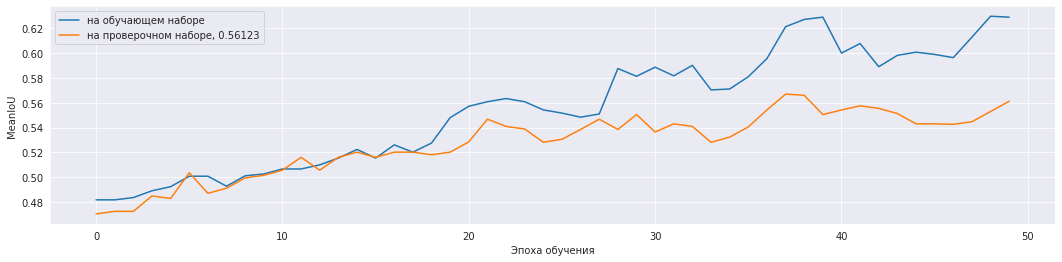

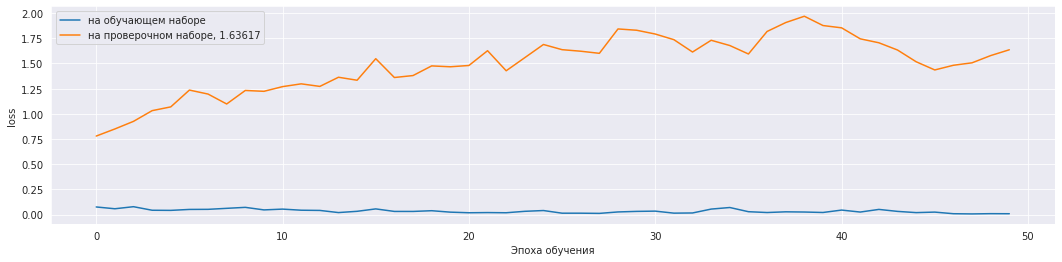

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'AUC', 'val_AUC')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')



In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 33ms/step - loss: 1.9389 - accuracy: 0.7500 - dice_coef: 0.7415 - MeanIoU: 0.5571 - AUC: 0.6401


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5')

score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 28ms/step - loss: 0.9849 - accuracy: 0.7433 - dice_coef: 0.6407 - MeanIoU: 0.4723 - AUC: 0.7336


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 43ms/step - loss: 2.0971 - accuracy: 0.7500 - dice_coef: 0.7274 - MeanIoU: 0.5612 - AUC: 0.6285


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=90, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    initial_epoch = 50,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 51/90
46/46 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9952 - dice_coef: 0.9923 - MeanIoU: 0.6347 - AUC: 0.9412
Epoch 51: val_accuracy did not improve from 0.78431

Epoch 51: val_loss did not improve from 0.77975

Epoch 51: val_MeanIoU did not improve from 0.56695
46/46 [==============================] - 7s 102ms/step - loss: 0.0139 - accuracy: 0.9952 - dice_coef: 0.9923 - MeanIoU: 0.6347 - AUC: 0.9412 - val_loss: 1.8473 - val_accuracy: 0.7569 - val_dice_coef: 0.7435 - val_MeanIoU: 0.5649 - val_AUC: 0.5452
Epoch 52/90
46/46 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9986 - dice_coef: 0.9939 - MeanIoU: 0.6413 - AUC: 0.9412
Epoch 52: val_accuracy did not improve from 0.78431

Epoch 52: val_loss did not improve from 0.77975

Epoch 52: val_MeanIoU did not improve from 0.56695
46/46 [==============================] - 3s 72ms/step - loss: 0.0075 - accuracy: 0.9986 - dice_coef: 0.9939 - MeanIoU: 0.6413 - AUC: 0.9412 - val_loss: 1

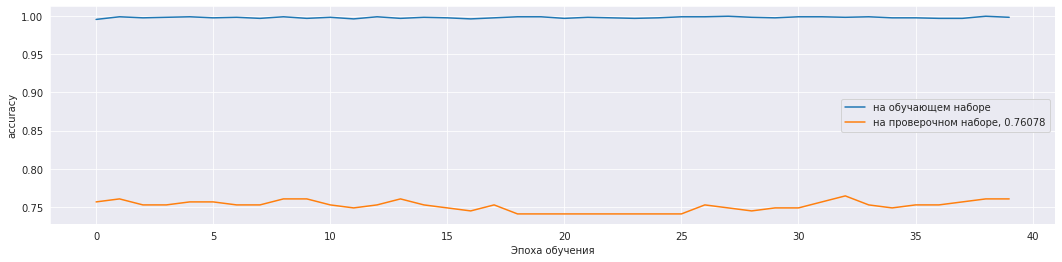

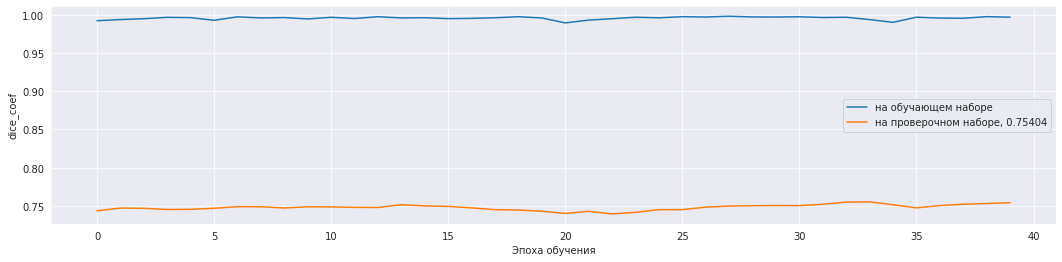

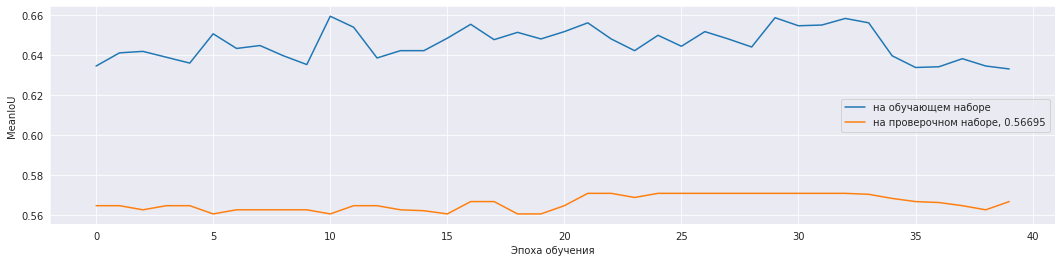

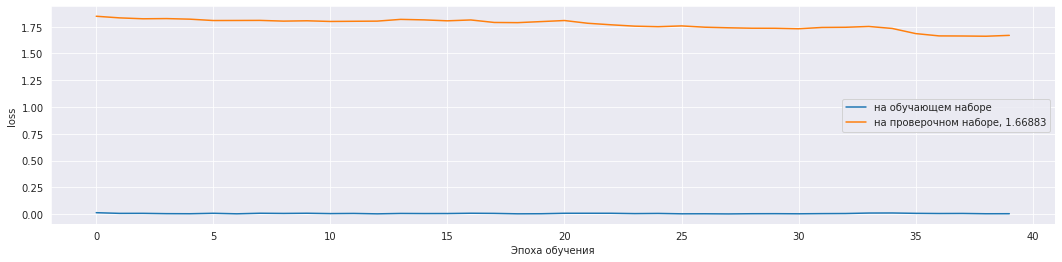

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5')

score = model.evaluate(BOW_test,Y_test)

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 2.2169 - accuracy: 0.7367 - dice_coef: 0.7200 - MeanIoU: 0.5736 - AUC: 0.6130


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=90, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    initial_epoch = 50,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 51/90
45/46 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979 - dice_coef: 0.9967 - MeanIoU: 0.6387 - AUC: 0.9350
Epoch 51: val_accuracy did not improve from 0.78431

Epoch 51: val_loss did not improve from 0.77975

Epoch 51: val_MeanIoU did not improve from 0.57107
46/46 [==============================] - 6s 88ms/step - loss: 0.0060 - accuracy: 0.9979 - dice_coef: 0.9968 - MeanIoU: 0.6394 - AUC: 0.9350 - val_loss: 1.7748 - val_accuracy: 0.7451 - val_dice_coef: 0.7437 - val_MeanIoU: 0.5711 - val_AUC: 0.5503
Epoch 52/90
46/46 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9979 - dice_coef: 0.9968 - MeanIoU: 0.6552 - AUC: 0.9412
Epoch 52: val_accuracy did not improve from 0.78431

Epoch 52: val_loss did not improve from 0.77975

Epoch 52: val_MeanIoU did not improve from 0.57107
46/46 [==============================] - 3s 73ms/step - loss: 0.0052 - accuracy: 0.9979 - dice_coef: 0.9968 - MeanIoU: 0.6552 - AUC: 0.9412 - val_loss: 1.

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 2.2420 - accuracy: 0.7367 - dice_coef: 0.7202 - MeanIoU: 0.5749 - AUC: 0.6149


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=90, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    initial_epoch = 50,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 51/90
46/46 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9979 - dice_coef: 0.9972 - MeanIoU: 0.6472 - AUC: 0.9353
Epoch 51: val_accuracy did not improve from 0.78431

Epoch 51: val_loss did not improve from 0.77975

Epoch 51: val_MeanIoU did not improve from 0.57518
46/46 [==============================] - 8s 101ms/step - loss: 0.0052 - accuracy: 0.9979 - dice_coef: 0.9972 - MeanIoU: 0.6472 - AUC: 0.9353 - val_loss: 1.8045 - val_accuracy: 0.7412 - val_dice_coef: 0.7468 - val_MeanIoU: 0.5731 - val_AUC: 0.5496
Epoch 52/90
46/46 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9979 - dice_coef: 0.9973 - MeanIoU: 0.6640 - AUC: 0.9412
Epoch 52: val_accuracy did not improve from 0.78431

Epoch 52: val_loss did not improve from 0.77975

Epoch 52: val_MeanIoU did not improve from 0.57518
46/46 [==============================] - 4s 89ms/step - loss: 0.0044 - accuracy: 0.9979 - dice_coef: 0.9973 - MeanIoU: 0.6640 - AUC: 0.9412 - val_loss: 1

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 2.2420 - accuracy: 0.7367 - dice_coef: 0.7202 - MeanIoU: 0.5749 - AUC: 0.6149


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.002),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=80, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    initial_epoch = 50,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 51/80
46/46 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9875 - dice_coef: 0.9841 - MeanIoU: 0.6668 - AUC: 0.9346
Epoch 51: val_accuracy did not improve from 0.78431

Epoch 51: val_loss did not improve from 0.77975

Epoch 51: val_MeanIoU did not improve from 0.57518
46/46 [==============================] - 7s 93ms/step - loss: 0.0563 - accuracy: 0.9875 - dice_coef: 0.9841 - MeanIoU: 0.6668 - AUC: 0.9346 - val_loss: 2.0994 - val_accuracy: 0.7216 - val_dice_coef: 0.7153 - val_MeanIoU: 0.5451 - val_AUC: 0.5315
Epoch 52/80
46/46 [==============================] - ETA: 0s - loss: 0.1888 - accuracy: 0.9585 - dice_coef: 0.9479 - MeanIoU: 0.5579 - AUC: 0.9334
Epoch 52: val_accuracy did not improve from 0.78431

Epoch 52: val_loss did not improve from 0.77975

Epoch 52: val_MeanIoU did not improve from 0.57518
46/46 [==============================] - 4s 77ms/step - loss: 0.1888 - accuracy: 0.9585 - dice_coef: 0.9479 - MeanIoU: 0.5579 - AUC: 0.9334 - val_loss: 2.

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 2.2381 - accuracy: 0.7433 - dice_coef: 0.7252 - MeanIoU: 0.5986 - AUC: 0.6328


## WordBOWTest, ETest, XdataTest

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 31ms/step - loss: 1.8504 - accuracy: 0.7500 - dice_coef: 0.7362 - MeanIoU: 0.5578 - AUC: 0.6306


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 24ms/step - loss: 2.2381 - accuracy: 0.7433 - dice_coef: 0.7252 - MeanIoU: 0.5986 - AUC: 0.6328


In [ ]:
# ПРЕДИКТ WordBOWTest
print(BOWTest.shape)

(1000, 6000)


In [ ]:
predictTest = model.predict(BOWTest)
dfS = predictTestSample(predictTest, '10_MIoU_0.5986')

(1000, 17)
(1000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weights №10_MIoU_0.5986.h5')

# №9: BOW(6000)"swish"__  MIoU_0.5693 > Score = 0.774188

In [ ]:
print(y_train.shape)
print(y_val.shape, '\n')

print(BOW_train.shape)
print(BOW_val.shape)

print(E_train.shape)
print(E_val.shape, '\n')

print(BOW_train.shape[1:])
print(y_train.shape[-1])

(1445, 17)
(255, 17) 

(1445, 6000)
(255, 6000)
(1445, 330)
(255, 330) 

(6000,)
17


In [ ]:
BOW_train.shape[1:]

(6000,)

In [ ]:
def createModel():
  input1 = Input(BOW_train.shape[1:])

  x1 = Dense(1024, activation="swish")(input1)  # "elu", "relu", "swish"
  x1 = Dropout(0.3)(x1)
  x1 = BatchNormalization()(x1)
  x1 = Dense(100, activation="swish")(x1)


  x2 = Dense(1024, activation="swish")(input1)
  x2 = Dropout(0.3)(x2)
  x2 = BatchNormalization()(x2)
  x2 = Dense(100, activation="softmax")(x2)


  x3 = Dense(500, activation="swish")(input1)
  x3 = Dropout(0.3)(x3)
  x3 = BatchNormalization()(x3)
  x3 = Dense(200, activation="softmax")(x3)

  x4 = Dense(200, activation="softmax")(input1)

  x5 = Dense(500, activation="softmax")(input1)

  x = concatenate([x1, x2, x3, x4, x5])

  x = Dense(100, activation='swish')(x)
  x = Dropout(0.3)(x)

#Выходной полносвязный слой
  out = Dense(y_train.shape[-1], activation='softmax')(x)

  model = Model(input1, out)
  
  model.compile(optimizer=Adam(learning_rate=0.001),                # Adam(lr=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])              # optimizer=Adam(lr=0.001), Adagrad - Среднеквадратичное распространение корня
                                                 # "categorical_crossentropy" Для задачь Классификации где несколько классов
                                                 # 'binary_crossentropy'  Для задачь Классификации где только 2 класса
                                                 # 'mse' универсальная,  для задачь Регрессии (Предсказания)

  return model                                   # Возвращаем созданную сеть

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 6000)]       0           []                               
                                                                                                  
 dense_109 (Dense)              (None, 1024)         6145024     ['input_12[0][0]']               
                                                                                                  
 dense_111 (Dense)              (None, 1024)         6145024     ['input_12[0][0]']               
                                                                                                  
 dense_113 (Dense)              (None, 500)          3000500     ['input_12[0][0]']               
                                                                                           

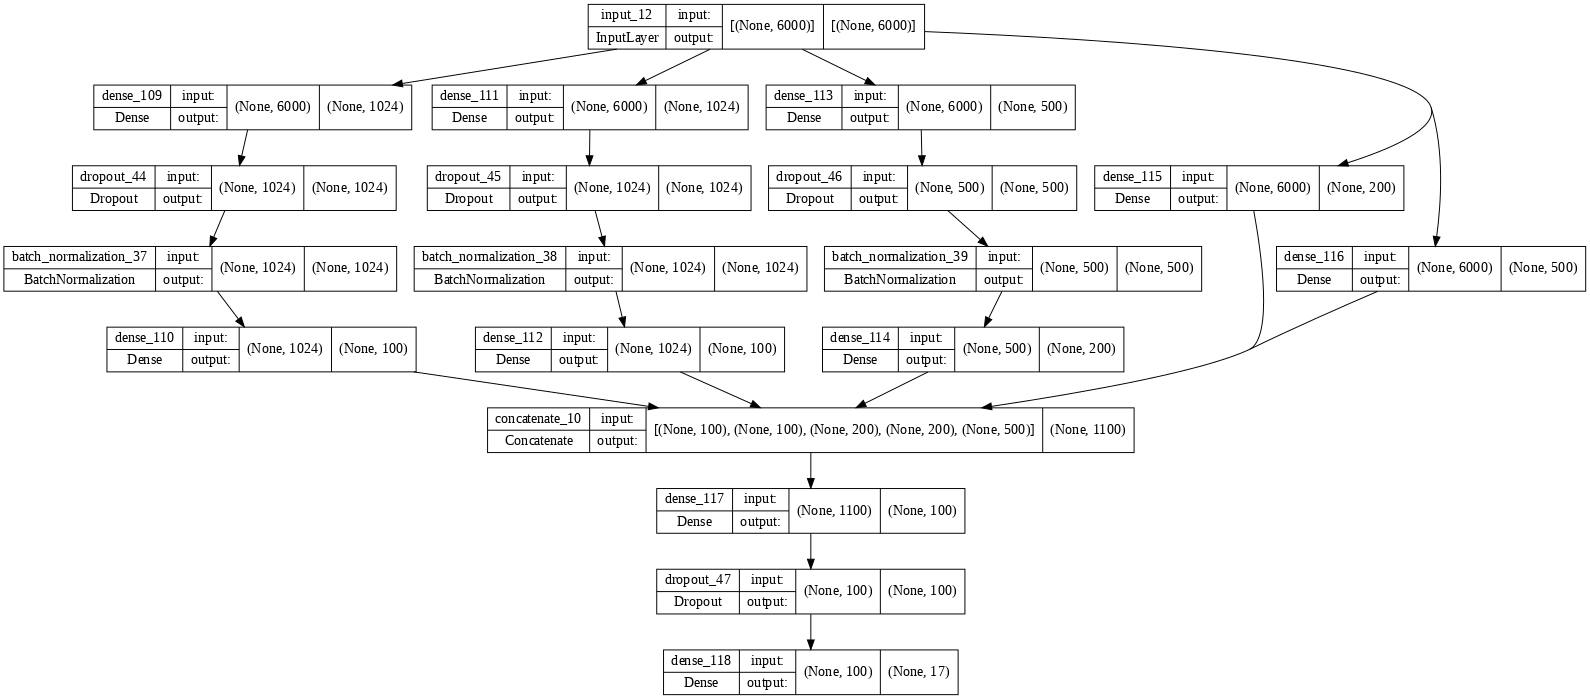

In [ ]:
model = createModel()
model.summary()
print()
plot_model(model, dpi=70, show_shapes=True )

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
#               loss='categorical_crossentropy', 
#               metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=40, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/40
46/46 [==============================] - ETA: 0s - loss: 1.4560 - accuracy: 0.6000 - dice_coef: 0.4254 - MeanIoU: 0.4706 - AUC: 0.6839
Epoch 1: val_accuracy improved from -inf to 0.63922, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5

Epoch 1: val_loss improved from inf to 2.16472, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5

Epoch 1: val_MeanIoU improved from -inf to 0.47059, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5
46/46 [==============================] - 11s 184ms/step - loss: 1.4560 - accuracy: 0.6000 - dice_coef: 0.4254 - MeanIoU: 0.4706 - AUC: 0.6839 - val_loss: 2.1647 - val_accuracy: 0.6392 - val_dice_coef: 0.1357 - val_MeanIoU: 0.4706 - val_AUC: 0.5901
Epoch 2/40
46/46 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.8747 - dice_coef: 0.8020 - MeanIoU: 0.4720 - AUC: 0.9232
Epoch 2: val_accuracy improved from 0.63922 to 0.69020, 

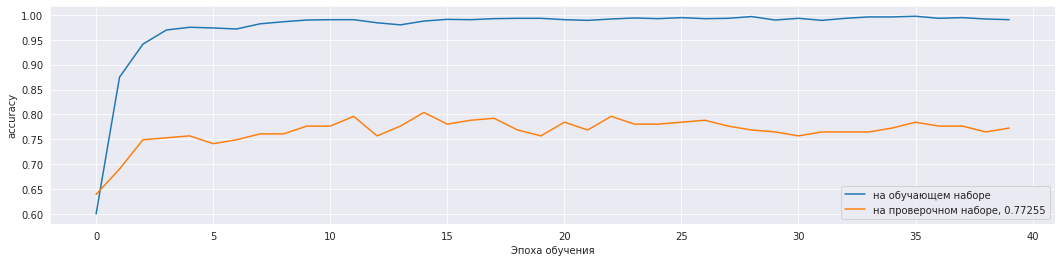

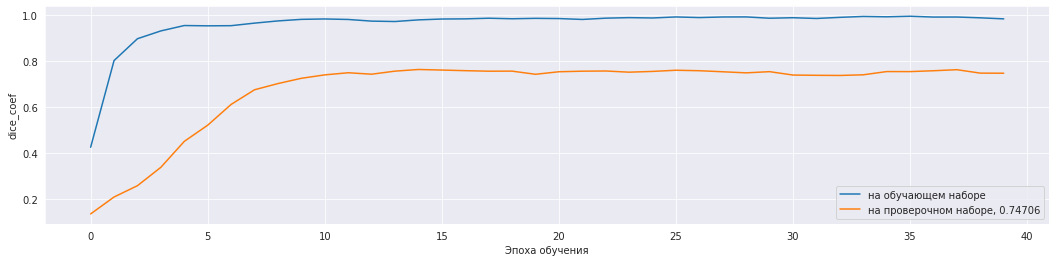

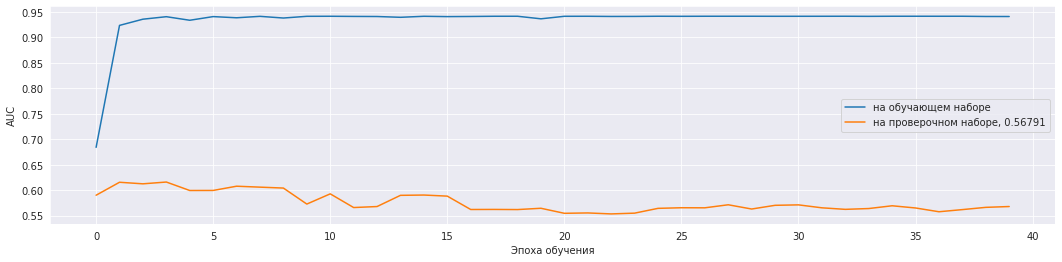

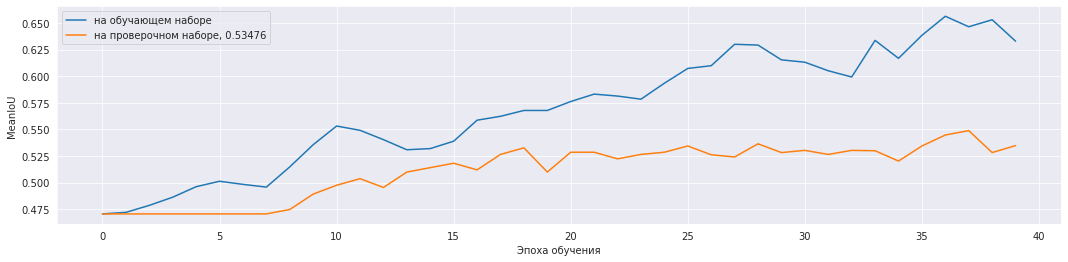

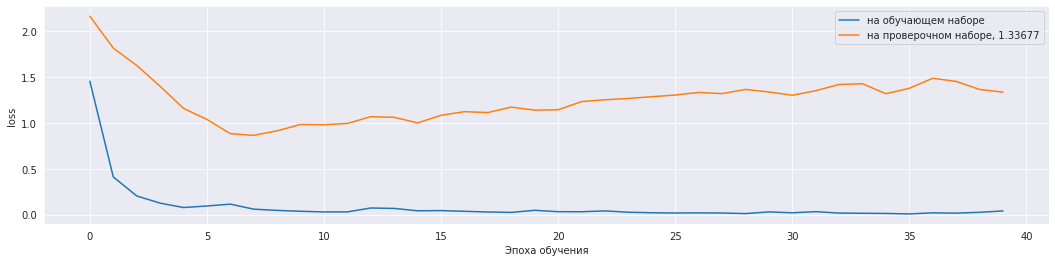

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'AUC', 'val_AUC')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')



In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 1.4498 - accuracy: 0.7433 - dice_coef: 0.7140 - MeanIoU: 0.5023 - AUC: 0.6389


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5')

score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 24ms/step - loss: 0.9272 - accuracy: 0.7567 - dice_coef: 0.6707 - MeanIoU: 0.4741 - AUC: 0.7022


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 1.8526 - accuracy: 0.7400 - dice_coef: 0.7134 - MeanIoU: 0.5477 - AUC: 0.6352


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=40, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/40
46/46 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9917 - dice_coef: 0.9892 - MeanIoU: 0.6451 - AUC: 0.9401
Epoch 1: val_accuracy did not improve from 0.80392

Epoch 1: val_loss did not improve from 0.86495

Epoch 1: val_MeanIoU did not improve from 0.54885
46/46 [==============================] - 7s 93ms/step - loss: 0.0182 - accuracy: 0.9917 - dice_coef: 0.9892 - MeanIoU: 0.6451 - AUC: 0.9401 - val_loss: 1.4810 - val_accuracy: 0.7882 - val_dice_coef: 0.7645 - val_MeanIoU: 0.5489 - val_AUC: 0.5569
Epoch 2/40
46/46 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9952 - dice_coef: 0.9934 - MeanIoU: 0.6592 - AUC: 0.9412
Epoch 2: val_accuracy did not improve from 0.80392

Epoch 2: val_loss did not improve from 0.86495

Epoch 2: val_MeanIoU did not improve from 0.54885
46/46 [==============================] - 4s 78ms/step - loss: 0.0122 - accuracy: 0.9952 - dice_coef: 0.9934 - MeanIoU: 0.6592 - AUC: 0.9412 - val_loss: 1.4584 - v

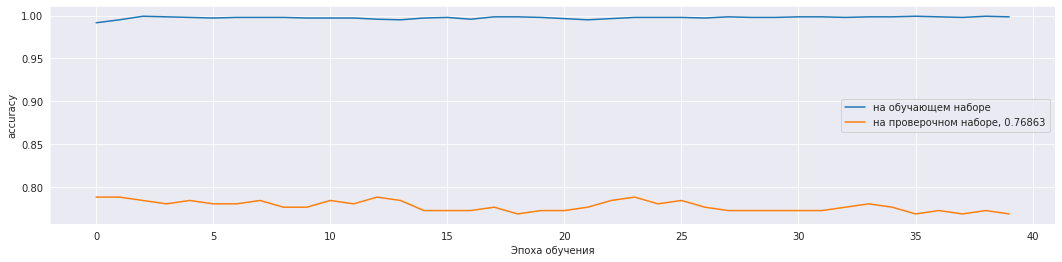

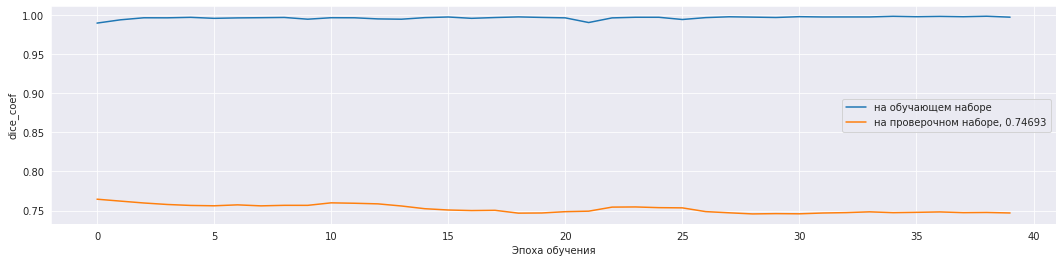

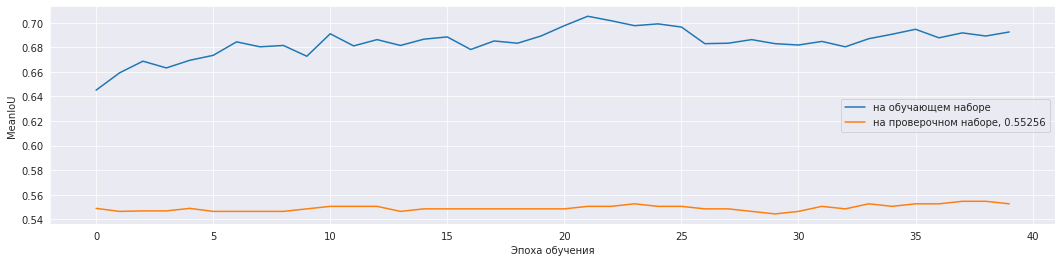

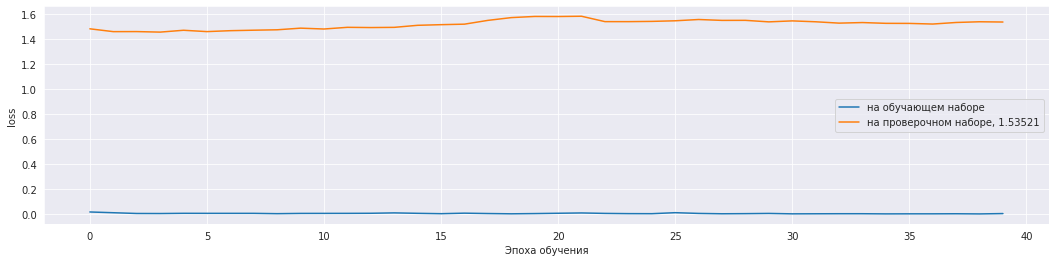

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(BOW_test, Y_test)

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5')

score = model.evaluate(BOW_test,Y_test)

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 24ms/step - loss: 1.9288 - accuracy: 0.7400 - dice_coef: 0.7120 - MeanIoU: 0.5470 - AUC: 0.6364


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00008),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=40, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/40
46/46 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9986 - dice_coef: 0.9938 - MeanIoU: 0.6761 - AUC: 0.9403
Epoch 1: val_accuracy did not improve from 0.80392

Epoch 1: val_loss did not improve from 0.86495

Epoch 1: val_MeanIoU did not improve from 0.55462
46/46 [==============================] - 8s 111ms/step - loss: 0.0056 - accuracy: 0.9986 - dice_coef: 0.9938 - MeanIoU: 0.6761 - AUC: 0.9403 - val_loss: 1.5313 - val_accuracy: 0.7608 - val_dice_coef: 0.7467 - val_MeanIoU: 0.5546 - val_AUC: 0.5669
Epoch 2/40
46/46 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9979 - dice_coef: 0.9972 - MeanIoU: 0.7068 - AUC: 0.9412
Epoch 2: val_accuracy did not improve from 0.80392

Epoch 2: val_loss did not improve from 0.86495

Epoch 2: val_MeanIoU improved from 0.55462 to 0.55667, saving model to /content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5
46/46 [==============================] - 4s 89ms/step - loss: 0.0043 - acc

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 25ms/step - loss: 2.0516 - accuracy: 0.7500 - dice_coef: 0.7144 - MeanIoU: 0.5693 - AUC: 0.6361


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=40, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/40
46/46 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9986 - dice_coef: 0.9973 - MeanIoU: 0.7065 - AUC: 0.9401
Epoch 1: val_accuracy did not improve from 0.80392

Epoch 1: val_loss did not improve from 0.86495

Epoch 1: val_MeanIoU did not improve from 0.56695
46/46 [==============================] - 7s 91ms/step - loss: 0.0046 - accuracy: 0.9986 - dice_coef: 0.9973 - MeanIoU: 0.7065 - AUC: 0.9401 - val_loss: 1.6470 - val_accuracy: 0.7804 - val_dice_coef: 0.7477 - val_MeanIoU: 0.5670 - val_AUC: 0.5630
Epoch 2/40
46/46 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9979 - dice_coef: 0.9970 - MeanIoU: 0.7347 - AUC: 0.9412
Epoch 2: val_accuracy did not improve from 0.80392

Epoch 2: val_loss did not improve from 0.86495

Epoch 2: val_MeanIoU did not improve from 0.56695
46/46 [==============================] - 3s 76ms/step - loss: 0.0046 - accuracy: 0.9979 - dice_coef: 0.9970 - MeanIoU: 0.7347 - AUC: 0.9412 - val_loss: 1.6512 - v

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 25ms/step - loss: 2.0516 - accuracy: 0.7500 - dice_coef: 0.7144 - MeanIoU: 0.5693 - AUC: 0.6361


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(BOW_train, 
                    y_train, 
                    epochs=30, 
                    validation_data=(BOW_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

## WordBOWTest, ETest, XdataTest

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 0s 23ms/step - loss: 2.0516 - accuracy: 0.7500 - dice_coef: 0.7144 - MeanIoU: 0.5693 - AUC: 0.6361


In [ ]:
# ПРЕДИКТ WordBOWTest
print(BOWTest.shape)

(1000, 6000)


In [ ]:
predictTest = model.predict(BOWTest)
dfS = predictTestSample(predictTest, '9MIoU_0.5693')

(1000, 17)
(1000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# model.save_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weights №9_MIoU_0.5693.h5')

# Проверка Итоговый > Score = 0.774188

In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weights №9_MIoU_0.5693.h5')
score = model.evaluate(BOW_test, Y_test)

10/10 [==============================] - 2s 28ms/step - loss: 2.0516 - accuracy: 0.7500 - dice_coef: 0.7144 - MeanIoU: 0.5693 - AUC: 0.6361


In [ ]:
# ПРЕДИКТ WordBOWTest
print(BOWTest.shape)

(1000, 6000)


In [ ]:
predictTest = model.predict(BOWTest)
dfS = predictTestSample(predictTest, '№9_0.77')

(1000, 17)
(1000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# №4: Emb (200)+ LSTM(40)  > Score = 0.656648

In [ ]:

print(y_train.shape)
print(y_val.shape, '\n')

print(BOW_train.shape)
print(BOW_val.shape)

print(E_train.shape)
print(E_val.shape, '\n')

print(BOW_train.shape[1:])
print(E_train.shape[-1])
print(y_train.shape[-1])

(1445, 17)
(255, 17) 

(1445, 10000)
(255, 10000)
(1445, 330)
(255, 330) 

(10000,)
330
17


In [ ]:
def createModel4():
# Последовательная модель
  model = Sequential()
# Входной полносвязный слой
  model.add(Embedding(maxWords, 200, input_length=E_train.shape[-1]))
# Слой регуляризации Dropout
  model.add(SpatialDropout1D(0.3))
  model.add(BatchNormalization())

  model.add(LSTM(40, return_sequences=True)) 

  model.add(Flatten())
  model.add(BatchNormalization())

  model.add(Dense(55, activation='relu'))
# Слой регуляризации Dropout
  model.add(Dropout(0.3))

# Выходной полносвязный слой
  model.add(Dense(y_train.shape[-1], activation='softmax'))

  model.compile(optimizer=Adam(learning_rate=0.001),                # Adam(lr=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])              # optimizer=Adam(lr=0.001), Adagrad - Среднеквадратичное распространение корня
                                                 # "categorical_crossentropy" Для задачь Классификации где несколько классов
                                                 # 'binary_crossentropy'  Для задачь Классификации где только 2 класса
                                                 # 'mse' универсальная,  для задачь Регрессии (Предсказания)


  return model 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 330, 200)          2000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 330, 200)         0         
 lDropout1D)                                                     
                                                                 
 batch_normalization_3 (Batc  (None, 330, 200)         800       
 hNormalization)                                                 
                                                                 
 lstm_1 (LSTM)               (None, 330, 40)           38560     
                                                                 
 flatten_2 (Flatten)         (None, 13200)             0         
                                                                 
 batch_normalization_4 (Batc  (None, 13200)           

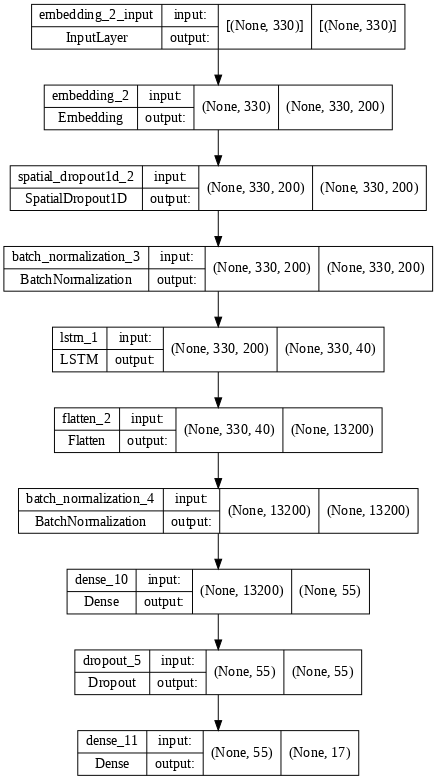

In [ ]:
model = createModel4()
model.summary()
print()
plot_model(model, dpi=70, show_shapes=True )

In [ ]:

model.compile(optimizer=Adam(learning_rate=0.0001),                # Adam(learning_rate=0.00001), optimizer='adam'  , RMSprop
              loss='categorical_crossentropy', 
              metrics=['accuracy', dice_coef, metrics])   

history = model.fit(E_train, 
                    y_train, 
                    epochs=40, 
                    validation_data=(E_val, y_val), 
                    verbose=1,
                    callbacks=[model_checkpointA, model_checkpointLoss, model_checkpointM])

Epoch 1/40
46/46 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9619 - dice_coef: 0.9546 - MeanIoU: 0.7292 - AUC: 0.9497
Epoch 1: val_accuracy did not improve from 0.67451

Epoch 1: val_loss did not improve from 2.11648

Epoch 1: val_MeanIoU did not improve from 0.62975
46/46 [==============================] - 13s 201ms/step - loss: 0.1506 - accuracy: 0.9619 - dice_coef: 0.9546 - MeanIoU: 0.7292 - AUC: 0.9497 - val_loss: 3.9340 - val_accuracy: 0.6667 - val_dice_coef: 0.6711 - val_MeanIoU: 0.6206 - val_AUC: 0.5976
Epoch 2/40
46/46 [==============================] - ETA: 0s - loss: 0.1154 - accuracy: 0.9696 - dice_coef: 0.9617 - MeanIoU: 0.7281 - AUC: 0.9349
Epoch 2: val_accuracy did not improve from 0.67451

Epoch 2: val_loss did not improve from 2.11648

Epoch 2: val_MeanIoU did not improve from 0.62975
46/46 [==============================] - 8s 180ms/step - loss: 0.1154 - accuracy: 0.9696 - dice_coef: 0.9617 - MeanIoU: 0.7281 - AUC: 0.9349 - val_loss: 3.7720 

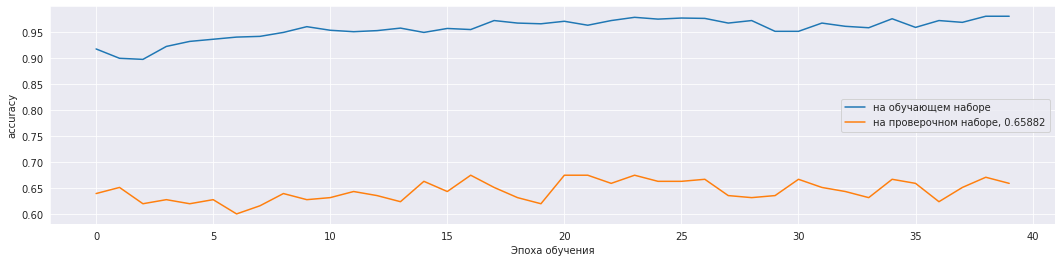

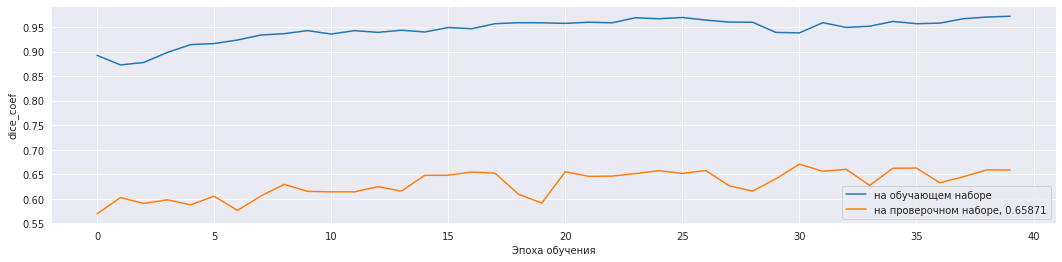

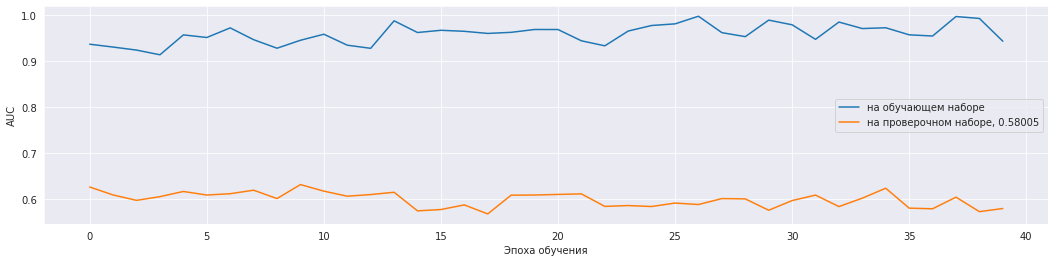

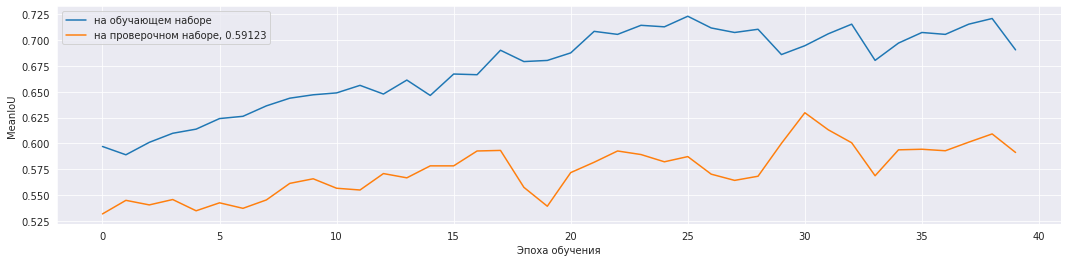

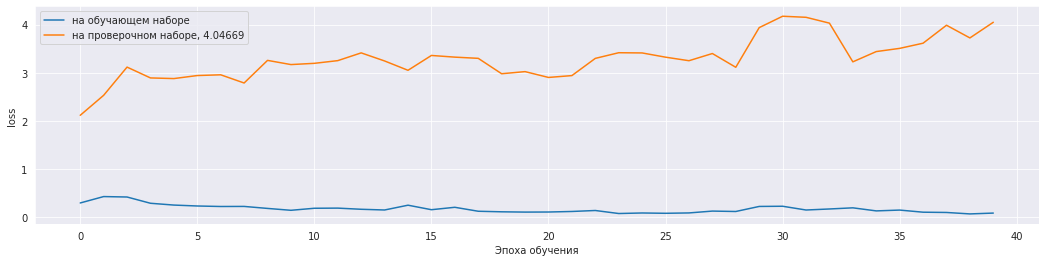

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'AUC', 'val_AUC')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')


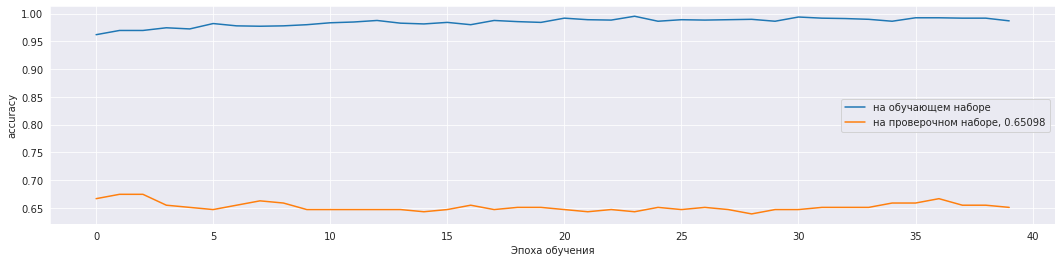

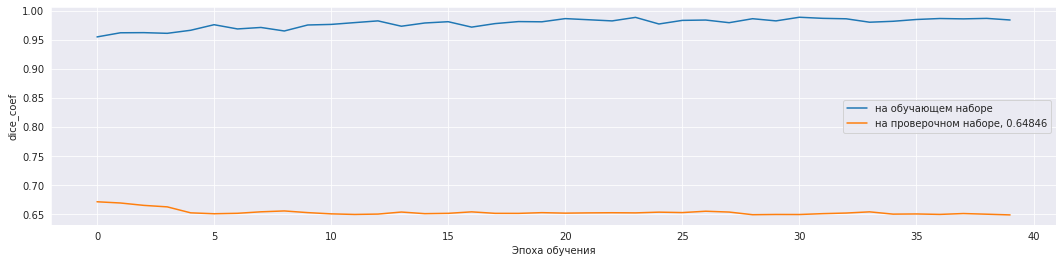

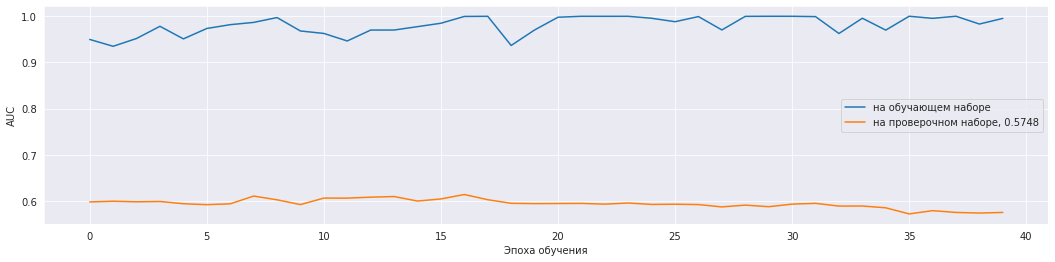

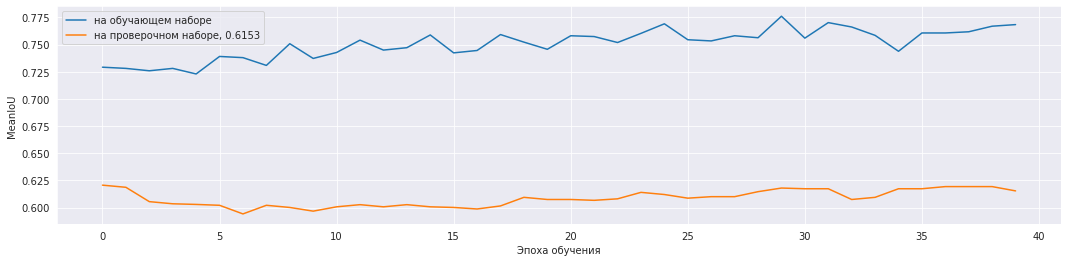

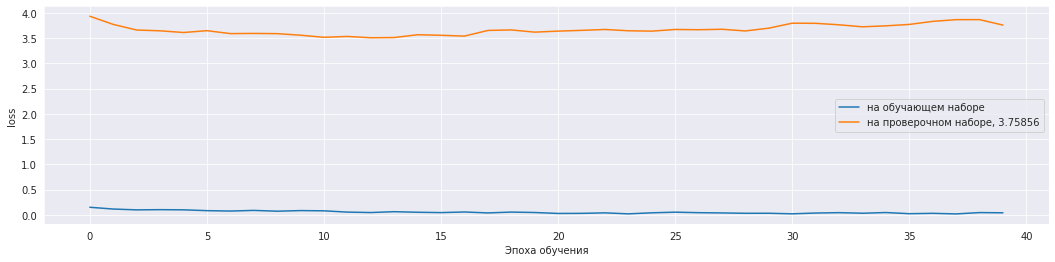

In [ ]:
pltFigure(history,'accuracy', 'val_accuracy')
pltFigure(history,'dice_coef', 'val_dice_coef')
pltFigure(history,'AUC', 'val_AUC')
pltFigure(history,'MeanIoU', 'val_MeanIoU')
pltFigure(history,'loss', 'val_loss')


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsA.h5')
score = model.evaluate(E_test, Y_test)

10/10 [==============================] - 0s 38ms/step - loss: 2.9378 - accuracy: 0.6800 - dice_coef: 0.6738 - MeanIoU: 0.5682 - AUC: 0.6189


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsM.h5')

score = model.evaluate(E_test, Y_test)

10/10 [==============================] - 0s 39ms/step - loss: 3.7914 - accuracy: 0.6967 - dice_coef: 0.6976 - MeanIoU: 0.6014 - AUC: 0.6187


In [ ]:
model.load_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weightsLoss.h5')

score = model.evaluate(E_test, Y_test)

10/10 [==============================] - 0s 46ms/step - loss: 1.8557 - accuracy: 0.6900 - dice_coef: 0.6165 - MeanIoU: 0.5089 - AUC: 0.6709


## WordBOWTest, ETest, XdataTest

In [ ]:
score = model.evaluate(E_test, Y_test)

10/10 [==============================] - 0s 38ms/step - loss: 1.8557 - accuracy: 0.6900 - dice_coef: 0.6165 - MeanIoU: 0.5089 - AUC: 0.6709


In [ ]:
# ПРЕДИКТ WordBOWTest
print(BOWTest.shape)
print(ETest.shape)

(1000, 10000)
(1000, 330)


In [ ]:
predictTest = model.predict(ETest)
predictTest.shape

(1000, 17)

In [ ]:
dfS = predictTestSample(predictTest, '4Loss')

(1000, 17)
(1000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# model.save_weights('/content/drive/My Drive/Курск_ классификацияNLP/model_weights№4_65.h5')